In [1]:
import nltk

In [2]:
import pandas as pd

resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
a = ['Um filme ruim', 'Um filme bom']

frequencia = nltk.FreqDist(a)

frequencia

FreqDist({'Um filme ruim': 1, 'Um filme bom': 1})

In [4]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [5]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

token_espaco = tokenize.WhitespaceTokenizer()
token_palavras = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_palavras)

frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [6]:
df_frequencia = pd.DataFrame(data={"palavras": list(frequencia.keys()),'frequencia':list(frequencia.values())})
df_frequencia.nlargest(columns='frequencia', n=10)

,palavras,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


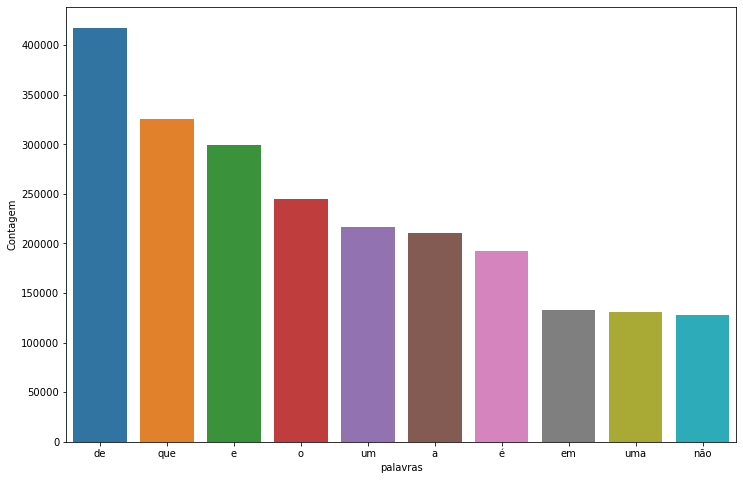

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

palavras_mais_frequentes = df_frequencia.nlargest(columns='frequencia', n=10)

plt.figure(figsize=(12,8))
ax = sns.barplot(data=palavras_mais_frequentes, x="palavras", y="frequencia")
ax.set(ylabel='Contagem')
plt.show()


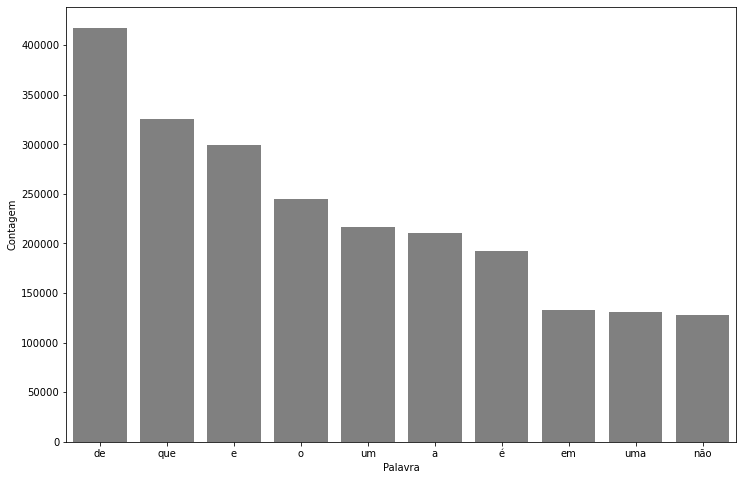

In [8]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame(
        {
            "Palavra": list(frequencia.keys()),
            "Frequência": list(frequencia.values())
        })
    
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    
    plt.figure(figsize=(12, 8))
    
    ax = sns.barplot(
        data=df_frequencia, x="Palavra",
        y="Frequência", color='gray')
    
    ax.set(ylabel="Contagem")
    plt.show()


pareto(resenha, "text_pt", 10)
